In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [24]:
class StockPair:
    def __init__(self, stock1, stock2, correlation):
        self.stock1 = stock1
        self.stock2 = stock2
        self.correlation = correlation

    def __repr__(self):
        return f"StockPair({self.stock1}, {self.stock2}, Correlation={self.correlation:.2f})"


In [25]:
def validate_prices(func):
    def wrapper(*args, **kwargs):
        df = func(*args, **kwargs)
        if df.isnull().values.any():
            print("⚠️ Missing values detected. Applying forward fill.")
            df.fillna(method='ffill', inplace=True)
        return df
    return wrapper


In [26]:
@validate_prices
def load_prices(file_path):
    return pd.read_csv(file_path, index_col=0, parse_dates=True)


def calculate_correlation(df):
    return df.corr()


def save_correlation(matrix, file_path):
    matrix.to_json(file_path)


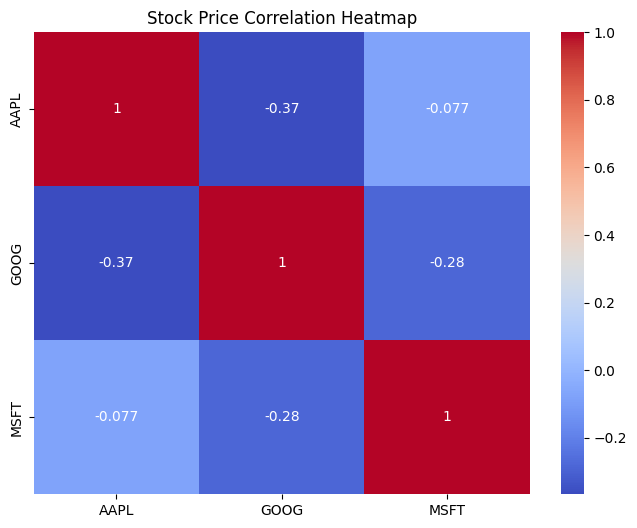

📊 Strongly Correlated Stock Pairs:



In [27]:
# Threshold for strong correlation
THRESHOLD = 0.7

# Load stock price data
df = load_prices("stock_prices.csv")

# Calculate correlation matrix
corr_matrix = calculate_correlation(data)

# Save correlation matrix
save_correlation(corr_matrix, "correlation_matrix.json")

# Display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Stock Price Correlation Heatmap")
plt.show()

# Identify strongly correlated stock pairs
pairs = []
columns = corr_matrix.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) >= THRESHOLD:
            pairs.append(StockPair(columns[i], columns[j], corr_value))

# Display results
print("📊 Strongly Correlated Stock Pairs:\n")
for pair in pairs:
    print(pair)


In [28]:
stocks = df.columns.tolist()

stock_pairs = [
    (stocks[i], stocks[j])
    for i in range(len(stocks))
    for j in range(i + 1, len(stocks))
]

stock_pairs


[('AAPL', 'GOOG'), ('AAPL', 'MSFT'), ('GOOG', 'MSFT')]

In [29]:
pair_results = []

corr_lambda = lambda x, y: np.corrcoef(x, y)[0, 1]

for s1, s2 in stock_pairs:
    price1 = df[s1]
    price2 = df[s2]
    
    correlation_value = corr_lambda(price1, price2)
    
    pair_results.append((s1, s2, correlation_value))

pair_results

[('AAPL', 'GOOG', np.float64(-0.3676350806705322)),
 ('AAPL', 'MSFT', np.float64(-0.07727880579416213)),
 ('GOOG', 'MSFT', np.float64(-0.28436500295519407))]

In [30]:
strong_pairs = [p for p in pair_results if p[2] > 0.8]
strong_pairs


[]

In [ ]:
if strong_pairs:
    top = strong_pairs[0]
    s1 = top[0]
    s2 = top[1]

    plt.figure(figsize=(10,5))
    plt.plot(df.index, df[s1], label=s1)
    plt.plot(df.index, df[s2], label=s2)
    
    plt.xlabel("Data")
    plt.ylabel("Closing Price")
    plt.title(f"Stock Price Comparison: {s1} vs {s2}")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No strong correlation pairs found.")


No strong correlation pairs found.
